# Starting out with Dimensions #

Dimcli is a Python client for accessing the Dimensions API, which helps authenticate into the API and handle query requests/responses.

In [1]:
# necessary imports
import dimcli
import pandas as pd

# visualization libraries
import seaborn as sns
import matplotlib as plt

In [24]:
# visualization settings
sns.set_style("white")
sns.set(rc={'figure.figsize':(12, 10)})

In [3]:
# get access with config file. resource: https://digital-science.github.io/dimcli/getting-started.html# 
dimcli.login()

Searching config file credentials for default 'live' instance..


Dimcli - Dimensions API Client (v1.2)
Connected to: <https://app.dimensions.ai/api/dsl> - DSL v2.9
Method: dsl.ini file


In [4]:
dsl = dimcli.Dsl()

# Publications

Querying Dimensions API with Dimcli objects

In [5]:
# some variables here to make it easier to query
GRIDID = "grid.266100.3" # Grid ID for University of California, San Diego
FIELDS = "title+type+year+journal+authors+research_orgs+research_org_names+publisher+times_cited"

In [6]:
query = f"""search publications in title_abstract_only
            for "artificial intelligence" 
            where research_orgs.id="{GRIDID}" 
            return publications[{FIELDS}] sort by year limit 645"""
result = dsl.query(query)

Returned Publications: 645 (total = 645)
Time: 2.29s
WARNINGS [1]
Field current_organization_id of the authors field is deprecated and will be removed in the next major release.


In [7]:
# turn result from Dimcli query into pandas dataframe
pubs = result.as_dataframe()
pubs.head()

,title,authors,research_org_names,research_orgs,times_cited,type,year,journal.id,journal.title,publisher
0,Pediatric endoscopy: how can we improve patien...,"[{'affiliations': [{'city': 'Boston', 'city_id...","[University of Toronto, Rady Children's Hospit...","[{'city_name': 'San Diego', 'country_code': 'U...",0,article,2024,jour.1037145,Expert Review of Gastroenterology & Hepatology,NaN
1,"P146: BeginNGS, an artificial intelligence-ena...","[{'affiliations': [{'city': None, 'city_id': N...","[Fabric Genomics, Illumina (United States), Ge...","[{'acronym': 'UCSD', 'city_name': 'San Diego',...",0,article,2024,jour.1452539,Genetics in Medicine Open,Elsevier
2,Impact of artificial intelligence arrhythmia m...,"[{'affiliations': [{'city': 'San Diego', 'city...","[University of California, San Diego, VA San D...","[{'acronym': 'UCSD', 'city_name': 'San Diego',...",0,article,2024,jour.1094057,Journal of Cardiovascular Electrophysiology,Wiley
3,A scoping review of artificial intelligence in...,"[{'affiliations': [{'city': 'Preston', 'city_i...","[Maastricht University, University of Californ...","[{'acronym': 'UM', 'city_name': 'Ann Arbor', '...",0,article,2024,jour.1090373,Medical Teacher,Taylor & Francis
4,Transforming Big Data into AI‐ready data for n...,"[{'affiliations': [{'city': 'West Point', 'cit...","[University of Alabama, Stevens Institute of T...","[{'acronym': 'UNC', 'city_name': 'Chapel Hill'...",0,article,2024,jour.1036439,Obesity,Wiley


In [20]:
# create dataframe to sort visualization of publishers
count_publisher = pubs['publisher'].value_counts().reset_index()
count_publisher = count_publisher[count_publisher['publisher'] > 4] # don't include publishers with less UCSD publications there
count_publisher.head()

,index,publisher
0,Springer Nature,188
1,Elsevier,116
2,Institute of Electrical and Electronics Engine...,66
3,Wiley,21
4,Association for Computing Machinery (ACM),21


After pulling publications from University of California, San Diego which are about artificial intelligence, let's visualize which journals people are publishing in and which publishers. 

<AxesSubplot: xlabel='publisher', ylabel='index'>

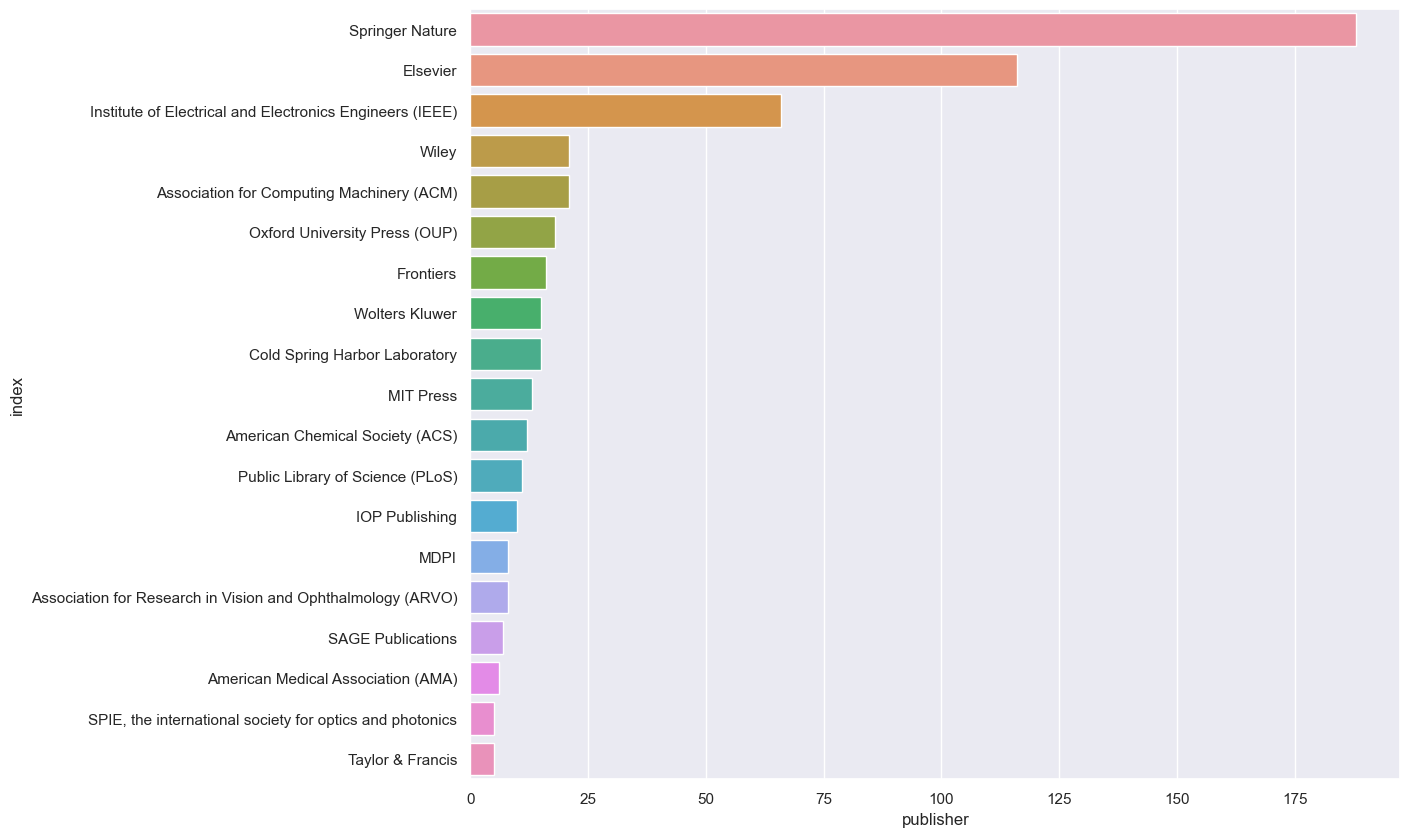

In [28]:
sns.barplot(count_publisher, x="publisher", y="index", order=count_publisher['index'])

Can also use Dimcli magic commands, specifically for the Jupyter environment, that run faster.

In [ ]:
%%dsldf --nice

search publications 
    for "malaria"
return publications [title + research_orgs + research_org_names + times_cited + funders]
limit 50

In [ ]:
# all magic commands result stored in..
dsl_last_results

# Datasets

At UCSD, where are people publishing datasets? 

In [ ]:
%dsldf search datasets for "machine learning" return datasets

In [ ]:
# normal query
res = dsl.query("search publications for \"artificial-intelligence\" return researchers") # return DslDataset object
[x['first_name'] + " " + x['last_name'] for x in res['researchers']]